In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns',1000) 
pd.set_option('max_row',300) 

In [41]:
train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
testA = pd.read_csv('used_car_testA_20200313.csv', sep=' ')

In [42]:
train.head().append(train.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [43]:
testA.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [44]:
train.shape

(150000, 31)

In [45]:
testA.shape

(50000, 30)

# 提取特征列名

In [46]:
all_data = pd.concat((train, testA), axis=0)

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [47]:
all_data.shape

(200000, 31)

In [48]:
del all_data['price']

In [49]:
all_data.shape

(200000, 30)

In [50]:
all_data.head()

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,power,regDate,regionCode,seller,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,0,60,20040402,1046,0,43.357796,3.966344,-2.881803,2.804097,-2.420821,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,-,0,0,20030301,4366,0,45.305273,5.236112,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,0,163,20040403,2806,0,45.978359,4.823792,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,0,193,19960908,434,0,45.687478,4.492574,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,0,68,20120103,6977,0,44.383511,2.031433,-1.896240,0.910783,0.931110,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534


In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               200000 non-null int64
name                 200000 non-null int64
regDate              200000 non-null int64
model                199999 non-null float64
brand                200000 non-null int64
bodyType             194081 non-null float64
fuelType             188427 non-null float64
gearbox              192109 non-null float64
power                200000 non-null int64
kilometer            200000 non-null float64
notRepairedDamage    200000 non-null object
regionCode           200000 non-null int64
seller               200000 non-null int64
offerType            200000 non-null int64
creatDate            200000 non-null int64
v_0                  200000 non-null float64
v_1                  200000 non-null float64
v_2                  200000 non-null float64
v_3                  200000 non-null float64
v_4                  200000 non-null float64
v_5      

In [16]:
# 数值型数据
all_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,200000.000000,200000.000000,2.000000e+05,199999.000000,200000.000000,194081.000000,188427.000000,192109.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,68397.435475,2.003411e+07,47.057895,8.053610,1.789820,0.375233,0.224794,119.458315,12.596765,2584.959155,0.000005,0.0,2.016033e+07,44.409259,-0.042916,0.073207,0.080285,0.017156,0.248320,0.044947,0.124205,0.058107,0.061997,-0.005214,0.003340,0.000221,-0.000552,-0.000137
std,57735.171256,61091.016948,5.365956e+04,49.519455,7.853592,1.760665,0.548118,0.417448,179.183258,3.916919,1883.266620,0.002236,0.0,1.006210e+02,2.450677,3.642053,2.911494,2.026510,1.193500,0.045506,0.051748,0.200065,0.029192,0.035682,3.766298,3.272461,2.517105,1.288388,1.035863
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015061e+07,28.987024,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,49999.750000,11170.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1021.000000,0.000000,0.0,2.016031e+07,43.136916,-3.192220,-0.970814,-1.460712,-0.922821,0.243652,0.000040,0.062518,0.035266,0.033879,-3.716989,-1.956648,-1.873019,-1.058617,-0.437238
50%,99999.500000,51785.500000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2202.000000,0.000000,0.0,2.016032e+07,44.610422,-3.052120,-0.383904,0.099317,-0.074809,0.257816,0.000813,0.095857,0.057024,0.058574,1.621345,-0.357720,-0.134311,-0.036196,0.140615
75%,149999.250000,118846.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3848.000000,0.000000,0.0,2.016033e+07,46.002708,4.000002,0.241203,1.564840,0.867383,0.265305,0.102014,0.125288,0.079292,0.087490,2.841749,1.257437,1.773703,0.942401,0.680567
max,199999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,8121.000000,1.000000,0.0,2.016041e+07,52.304178,7.553517,19.035496,9.854702,6.829352,0.291838,0.153265,1.404936,0.160791,0.222787,12.357011,18.856218,13.847792,11.147669,8.658418


# 查看缺失值

In [23]:
all_data['notRepairedDamage'].value_counts()

0.0    148610
-       32355
1.0     19035
Name: notRepairedDamage, dtype: int64

notRepairedDamage汽车有尚未修复的损坏，

把 ‘-’替换成‘未知’，并使用LabelEncoder填充

### LabelEncoder

LabelEncoder常用于处理有顺序关系的object类型的特征，比如衣服的size: S/M/L/XL等

OneHotEncoder常用于处理无顺序关系的特征，往往会使数据变得稀疏，搭配PCA使用，在使用树模型的时候，一般不需要onehot，因为树模型不依赖距离。

### one-hot encoder的方式

① pd.get_dummies(prefix=)

pandas的get_dummies()可以直接对变量进行one-hot编码，其中prefix是为one-hot编码后的变量进行命名。

eg pd.get_dummies(data['Sex'])

②LabelEncoder和OneHotEncoder

我们也可以通过sklearn的模块实现对离散变量的one-hot编码，其中LabelEncoder是将离散变量替换为数字，

OneHotEncoder则实现对替换为数字的离散变量进行one-hot编码。

注：get_dummies()可以直接对字符型变量进行one-hot编码，但OneHotEncoder不能直接对字符型变量编码，因此我们需要先将字符型变量转换为数值型变量。这就是为什么在OneHotEncoder之前需要LabelEncoder的原因。

In [24]:
all_data['notRepairedDamage'][all_data['notRepairedDamage']=='-'] = 'unk'

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
all_data['notRepairedDamage'] = LabelEncoder().fit_transform(all_data['notRepairedDamage'])

In [26]:
all_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0,1046,0,0,20160404,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,2,4366,0,0,20160309,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0,2806,0,0,20160402,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0,434,0,0,20160312,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0,6977,0,0,20160313,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [27]:
all_data.shape

(200000, 30)

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               200000 non-null int64
name                 200000 non-null int64
regDate              200000 non-null int64
model                199999 non-null float64
brand                200000 non-null int64
bodyType             194081 non-null float64
fuelType             188427 non-null float64
gearbox              192109 non-null float64
power                200000 non-null int64
kilometer            200000 non-null float64
notRepairedDamage    200000 non-null int64
regionCode           200000 non-null int64
seller               200000 non-null int64
offerType            200000 non-null int64
creatDate            200000 non-null int64
v_0                  200000 non-null float64
v_1                  200000 non-null float64
v_2                  200000 non-null float64
v_3                  200000 non-null float64
v_4                  200000 non-null float64
v_5       

In [29]:
# 缺失值分析
def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing_ratio = missing/len(df)*100
    missing_ratio.plot.bar()
    plt.ylabel('missing_ratio %')
    plt.xticks(rotation=360)
    alldata_na = pd.DataFrame(missing, columns={'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    alldata_na.set_index('index',inplace=True)
    return alldata_na

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
fuelType,11573,188427,200000,5.7865,float64
gearbox,7891,192109,200000,3.9455,float64
bodyType,5919,194081,200000,2.9595,float64
model,1,199999,200000,0.0005,float64


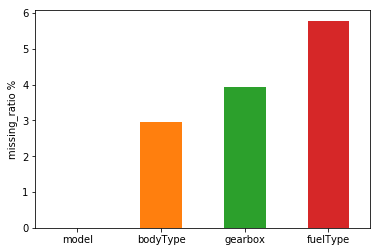

In [30]:
missing_values(all_data)

## missingno缺失值可视化处理

In [31]:
import missingno as msno

### matrix矩形无效矩阵的数据密集显示

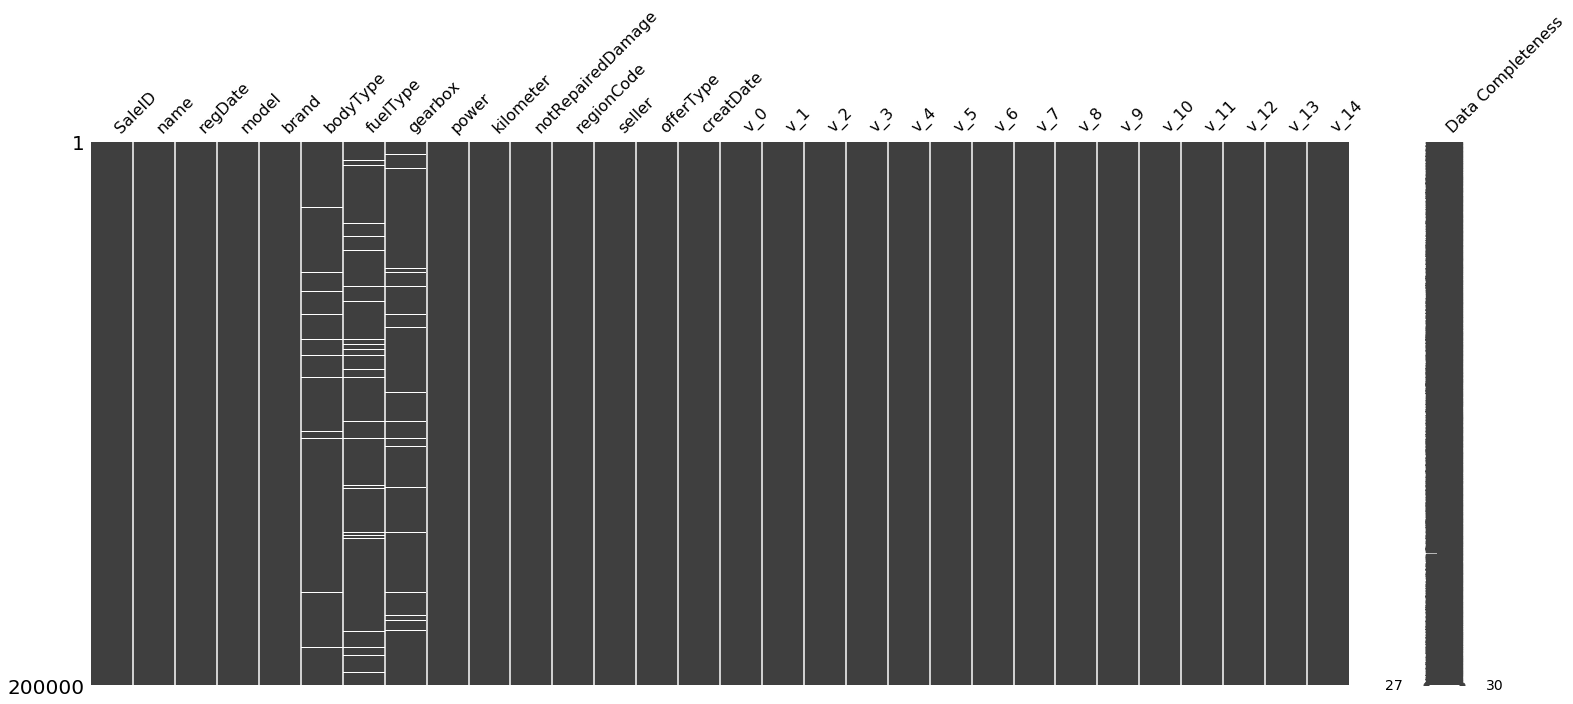

In [32]:
msno.matrix(all_data, labels=True)

### bar条形图列的无效的简单可视化

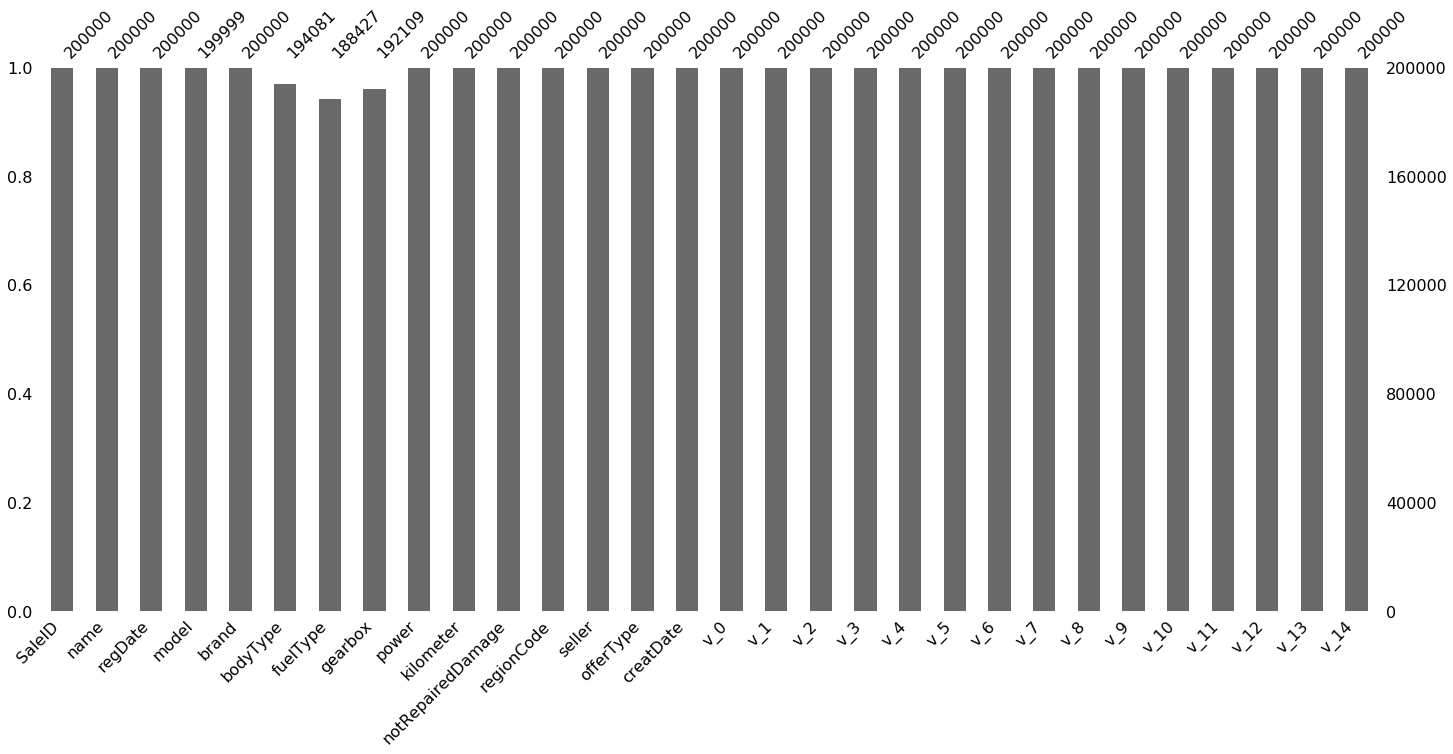

In [33]:
msno.bar(all_data)

 ### heatmap热图相关性
 无效的相关性：一个变量的存在或不存在如何强烈影响的另一个的存在

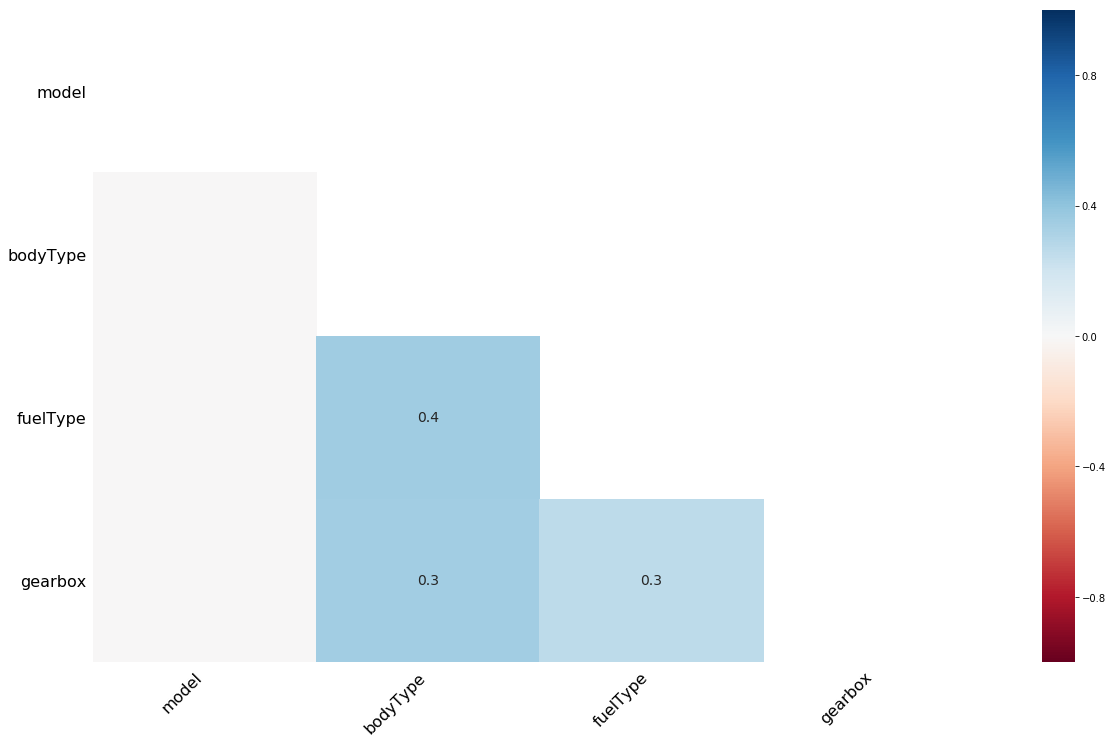

In [34]:
msno.heatmap(all_data)

# 特征分为类别特征和数字特征，类别特征unique分布

categorical_feas : 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller', 'offerType'


In [56]:
numeric_feas = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_feas = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [19]:
# 特征nunique分布
for feature in categorical_feas:
    print(feature + " 的特征分布类型有%d种" % (all_data[feature].value_counts().count()))
    print("特征分布如下：")
    print(all_data[feature].value_counts())

name 的特征分布类型有128466种
特征分布如下：
708       378
55        377
387       377
1541      351
203       300
53        293
713       291
1186      251
911       246
290       245
2044      238
631       222
1180      210
1513      207
893       207
2765      197
1139      194
473       185
2866      183
1108      182
444       170
306       163
422       152
1479      151
964       148
2402      148
4635      145
725       145
533       143
984       135
1847      132
1373      132
180       124
2205      122
299       122
691       122
1273      122
1752      116
2825      114
1983      114
736       112
282       111
2117      110
963       108
261       108
3050      106
705       106
602       104
700       103
853       103
811        98
1896       98
1005       97
4508       97
1519       96
223        96
211        92
345        91
7691       91
395        90
3211       89
4543       88
2741       88
1237       86
2804       85
2863       84
5185       82
5310       82
2845       81
1950 

由特征unique分布可以看出，seller和offerType可以删掉

In [48]:
all_data.drop(['seller', 'offerType'], inplace=True, axis=1)

In [49]:
all_data.shape

(200000, 28)

In [50]:
all_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0,1046,20160404,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,2,4366,20160309,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0,2806,20160402,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0,434,20160312,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0,6977,20160313,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


# 数字特征分析

In [51]:
train.shape

(150000, 31)

In [52]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [61]:
numeric_feas.append('price')

In [62]:
numeric_feas

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [66]:
price_numeric = train[numeric_feas]
corr = price_numeric.corr()
print(corr['price'])

power        0.219834
kilometer   -0.440519
v_0          0.628397
v_1          0.060914
v_2          0.085322
v_3         -0.730946
v_4         -0.147085
v_5          0.164317
v_6          0.068970
v_7         -0.053024
v_8          0.685798
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
v_12         0.692823
v_13        -0.013993
v_14         0.035911
price        1.000000
Name: price, dtype: float64


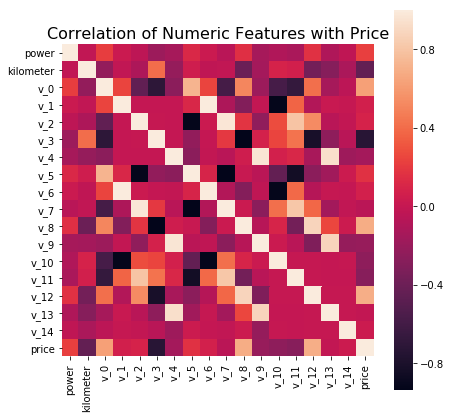

In [71]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(corr, square=True)

# 单调特征列分析

In [54]:
#是否有单调特征列(单调的特征列很大可能是时间)
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in all_data.columns]
for col in fea_cols:
    cnt = incresing(all_data[col].values)
    if cnt / all_data.shape[0] >= 0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / all_data.shape[0])

单调特征： SaleID
单调特征值个数： 199999
单调特征值比例： 0.999995


由于SaleID不是特征，所以该数据集没有单调特征列

# 标签分布

In [4]:
label = train['price']

In [5]:
train['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
2800      912
400       911
1400      903
3200      886
250       882
2300      844
450       842
1900      815
1700      809
1350      805
7500      783
2900      782
4000      777
2999      771
200       768
3900      750
8500      738
1450      729
1950      725
2600      724
1650      711
1750      710
5000      702
1850      677
2400      672
3800      672
4200      657
2700      655
1150      654
6000      654
3300      651
9500      648
5900      646
3999      646
2100      639
150       631
4900      607
10500     600
6900      574
4999      568
1499      516
11500 

seaborn可以用来拟合的曲线有

可以看出约翰逊拟合的更好

D:\software\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


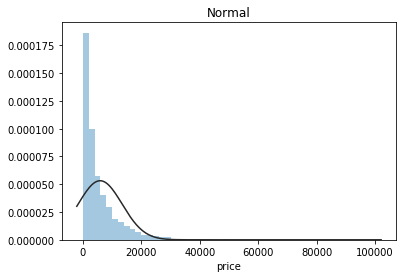

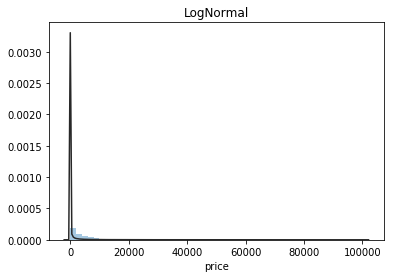

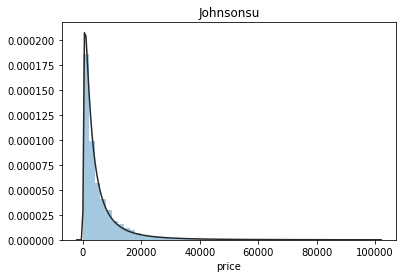

In [7]:
import seaborn as sns
import scipy.stats as st
plt.figure(1)
plt.title('Normal')
sns.distplot(label, kde=False, fit=st.norm)
plt.figure(2)
plt.title('LogNormal')
sns.distplot(label, kde=False, fit=st.lognorm)
plt.figure(3)
plt.title('Johnsonsu')
sns.distplot(label, kde=False, fit=st.johnsonsu)

D:\software\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


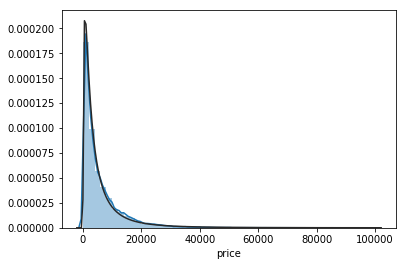

In [9]:
# 这里是用无界约翰逊拟合的曲线，可以看出，几乎与原曲线一致。
sns.distplot(label, kde=True, fit=st.johnsonsu)

(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <a list of 10 Patch objects>)

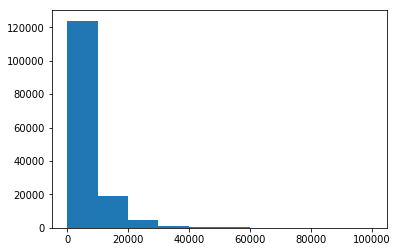

In [10]:
# 绘制label的直方图
plt.hist(label)

由价格的直方图可以看出，价格高于20000的很少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   909.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <a list of 10 Patch objects>)

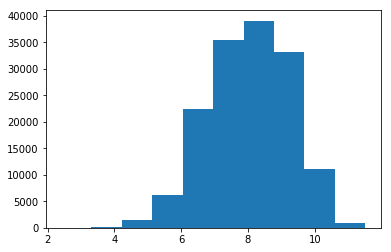

In [11]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(label))

In [ ]:
numeric_feats = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_feats = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]